In [1]:
# 数据处理及导入导出
import pandas as pd  
# 爬虫
import requests  
import math  
import time
import sys, urllib
# 数据可视化
import seaborn as sns
import matplotlib.pyplot as plt
# 统计建模
import statsmodels.api as sm
# 词云
from wordcloud import WordCloud  
from imageio import imread
import jieba

In [2]:
def get_json(url, num, encode_city, position):  
    '''
        从网页获取 JSON，使用 POST 请求，加上头部信息
    '''
    # Request Headers
    my_headers = {  
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36',  
        'Host':'www.lagou.com',  
        'Referer':'https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86?city=' + encode_city + '&cl=false&fromSearch=true&labelWords=&suginput=',  
        'X-Anit-Forge-Code':'0',  
        'X-Anit-Forge-Token': 'None',  
        'X-Requested-With':'XMLHttpRequest'  
    }

    # Form Data
    my_data = {  
        'first': 'true',  
        'pn': num,  
        'kd': position
    }  
    
    res = requests.post(url, headers = my_headers, data = my_data)  
    res.raise_for_status()  
    res.encoding = 'utf-8'  
    
    # 得到包含职位信息的字典  
    page = res.json()  
    return page  

In [3]:
def get_page_num(count):  
    '''
        计算要抓取的页数
    '''  
    # 每页15个职位,向上取整  
    res = math.ceil(count/15)  
    # 拉勾网最多显示30页结果  
    if res > 30:  
        return 30  
    else:  
        return res  

In [4]:
def get_page_info(jobs_list):  
    ''''
        对一个网页的职位信息进行解析,返回列表
    '''  
    page_info_list = []  
    
    for i in jobs_list:  
        job_info = []  
        job_info.append(i['companyFullName'])  
        job_info.append(i['companyShortName'])  
        job_info.append(i['companySize']) 
        job_info.append(i['financeStage'])  
        job_info.append(i['district'])  
        job_info.append(i['industryField'])  
        job_info.append(i['positionName'])  
        job_info.append(i['jobNature']) 
        job_info.append(i['firstType']) 
        job_info.append(i['secondType']) 
        job_info.append(i['workYear'])  
        job_info.append(i['education'])  
        job_info.append(i['salary'])  
        job_info.append(i['positionAdvantage'])  
        page_info_list.append(job_info)  
    
    return page_info_list  

In [5]:
def lagou_spider(city, position):  
    '''
        爬取拉勾职位列表数据
    '''
    # encode city
    encode_city = urllib.parse.quote(city)
    
    # Request URL
    url = 'https://www.lagou.com/jobs/positionAjax.json?city=' + encode_city + '&needAddtionalResult=false'  
    
    # 先设定页数为1,获取总的职位数  
    first_page = get_json(url,1, encode_city, position)  
    total_count = first_page['content']['positionResult']['totalCount']  
    num = get_page_num(total_count)  
    total_info = []  
    time.sleep(20)  
    print('职位总数:{},页数:{}'.format(total_count,num))  

    for n in range(1,num+1):  
        # 对每个网页读取JSON, 获取每页数据  
        page = get_json(url, n, encode_city, position)  
        jobs_list = page['content']['positionResult']['result']  
        page_info = get_page_info(jobs_list)  
        total_info += page_info  
        print('已经抓取第{}页, 职位总数:{}'.format(n, len(total_info)))  
        # 每次抓取完成后,暂停一会,防止被服务器拉黑  
        time.sleep(30)  
       
    #将总数据转化为 DataFrame再输出  
    df = pd.DataFrame(data = total_info,columns = ['公司全名', '公司简称', '公司规模', '融资阶段', '区域', '行业', 
                                                   '职位名称', '工作性质', '一级类别', '二级类别', '工作经验', '学历要求', '工资','职位福利'])   
    data_output = 'data\\' + city + '—' + position + '.csv'
    df.to_csv(data_output, index = False)  
    
    print('已保存为csv文件.')  

In [6]:
# 输入工作城市和目标职位
city = input("工作城市：\n")
position = input("目标职位：\n")

工作城市：
广州
目标职位：
产品经理


In [7]:
# 运行爬虫
lagou_spider(city, position)

职位总数:1176,页数:30
已经抓取第1页, 职位总数:15
已经抓取第2页, 职位总数:30
已经抓取第3页, 职位总数:45
已经抓取第4页, 职位总数:60
已经抓取第5页, 职位总数:75
已经抓取第6页, 职位总数:90
已经抓取第7页, 职位总数:105
已经抓取第8页, 职位总数:120
已经抓取第9页, 职位总数:135
已经抓取第10页, 职位总数:150
已经抓取第11页, 职位总数:165
已经抓取第12页, 职位总数:180
已经抓取第13页, 职位总数:195
已经抓取第14页, 职位总数:210
已经抓取第15页, 职位总数:225
已经抓取第16页, 职位总数:240
已经抓取第17页, 职位总数:255
已经抓取第18页, 职位总数:270
已经抓取第19页, 职位总数:285
已经抓取第20页, 职位总数:300
已经抓取第21页, 职位总数:315
已经抓取第22页, 职位总数:330
已经抓取第23页, 职位总数:345
已经抓取第24页, 职位总数:360
已经抓取第25页, 职位总数:375
已经抓取第26页, 职位总数:390
已经抓取第27页, 职位总数:405
已经抓取第28页, 职位总数:420
已经抓取第29页, 职位总数:435
已经抓取第30页, 职位总数:450
已保存为csv文件.


In [40]:
# 读取数据  
file = open('data\\' + city + '—' + position + '.csv', 'rb')
df = pd.read_csv(file, encoding = 'utf-8')  

In [41]:
df.head()

,公司全名,公司简称,公司规模,融资阶段,区域,行业,职位名称,工作性质,一级类别,二级类别,工作经验,学历要求,工资,职位福利
0,广州臻爱教育科技有限公司,臻爱教育,少于15人,未融资,海珠区,教育,产品经理/助理 Product Manager,全职,产品/需求/项目类,产品设计/需求分析,不限,大专,8k-15k,"五险一金,享双休年假,学习空间大,快乐工作"
1,广州康乐富健康管家有限公司,康乐富,150-500人,不需要融资,天河区,"医疗健康,生活服务",产品经理,全职,产品/需求/项目类,产品设计/需求分析,3-5年,大专,6k-12k,"弹性上下班,双休,发展空间大,自我实现"
2,广东世纪晓教育科技有限公司,晓教育,2000人以上,不需要融资,天河区,教育,产品经理,全职,产品/需求/项目类,产品设计/需求分析,1-3年,本科,10k-15k,"风口行业,年终奖,员工旅游,行业前三"
3,广东链动网络科技有限公司,链动科技,50-150人,不需要融资,海珠区,"移动互联网,电子商务",产品经理,全职,产品/需求/项目类,产品设计/需求分析,5-10年,大专,15k-25k,"五险一金,周末双休,发展空间"
4,广东智源信息技术有限公司,广东智源,50-150人,不需要融资,越秀区,"移动互联网,企业服务",产品经理,全职,产品/需求/项目类,产品设计/需求分析,不限,硕士,5k-10k,"月度活动,年度旅游,绩效奖金,五险一金"


In [42]:
# 剔除实习岗位  
df.drop(df[df['工作性质'].str.contains('实习')].index, inplace=True)  

In [43]:
df.describe()

,公司全名,公司简称,公司规模,融资阶段,区域,行业,职位名称,工作性质,一级类别,二级类别,工作经验,学历要求,工资,职位福利
count,450,450,449,449,448,449,450,450,450,450,450,450,450,450
unique,346,346,6,8,11,85,79,1,8,19,5,4,87,424
top,广州华多网络科技有限公司,欢聚时代（YY Inc）,50-150人,不需要融资,天河区,移动互联网,产品经理,全职,产品/需求/项目类,产品设计/需求分析,3-5年,本科,10k-20k,"五险一金,绩效奖金,周末双休,超一亿会员"
freq,8,8,124,124,232,114,316,450,413,392,206,325,60,4


In [44]:
pattern = '\d+'  
df['工作年限'] = df['工作经验'].str.findall(pattern)

avg_work_year = []  
for i in df['工作年限']:  
    # 如果工作经验为 '不限' 或 '应届毕业生' ,那么匹配值为空,工作年限为 0  
    if len(i) == 0:  
        avg_work_year.append(0)  
   # 如果匹配值为一个数值,那么返回该数值  
    elif len(i) == 1:  
        avg_work_year.append(int(''.join(i)))  
   # 如果匹配值为一个区间,那么取平均值  
    else:  
        num_list = [int(j) for j in i]  
        avg_year = sum(num_list) / 2  
        avg_work_year.append(avg_year)
        
df['经验要求'] = avg_work_year
        
# 将字符串转化为列表,再取区间的前25%，比较贴近现实  
df['salary'] = df['工资'].str.findall(pattern)  

avg_salary = []  
for k in df['salary']:  
    int_list = [int(n) for n in k]  
    avg_wage = int_list[0] + (int_list[1] - int_list[0]) / 4  
    avg_salary.append(avg_wage) 

df['月工资'] = avg_salary

In [45]:
# 将清洗后的数据保存
df.to_csv('data\\' + city + '—' + position + '（已清洗）' + '.csv', index = False)

In [46]:
# 读取清洗后的数据  
file = open('data\\' + city + '—' + position + '（已清洗）' + '.csv', 'rb')
df2 = pd.read_csv(file, encoding = 'utf-8')  

In [47]:
# 描述统计  
print('工资描述：\n{}'.format(df2['月工资'].describe()))

工资描述：
count    450.000000
mean      12.885556
std        4.888166
min        1.250000
25%        9.750000
50%       12.000000
75%       16.000000
max       31.250000
Name: 月工资, dtype: float64


In [48]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
sns.set(font='SimHei')  # 解决 Seaborn 中文显示问题

E:\IDE\Anaconda3\envs\gaius\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


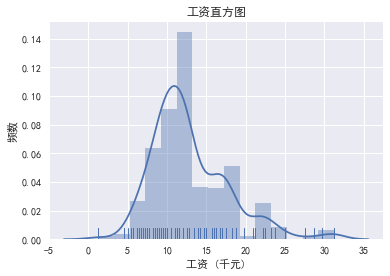

In [49]:
# 绘制频率直方图并保存  
sns.distplot(df2['月工资'], bins=15, kde=True, rug=True)
plt.title("工资直方图")
plt.xlabel('工资 (千元)')   
plt.ylabel('频数')      
plt.savefig('output\histogram.jpg')  
plt.show();

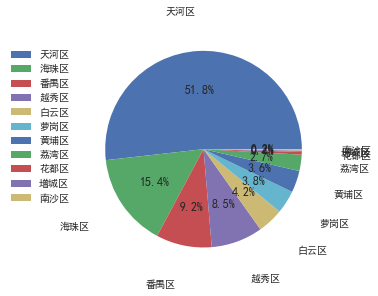

In [50]:
count = df2['区域'].value_counts()

# 绘制饼图并保存  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pie(count, labels = count.keys(), labeldistance=1.4, autopct='%2.1f%%')  
plt.axis('equal')  # 使饼图为正圆形  
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))  
plt.savefig('output\pie_chart.jpg')  
plt.show()  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gaiusyao\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


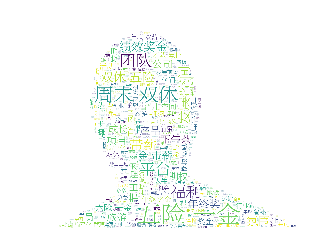

In [51]:
# 绘制词云,将职位福利中的字符串汇总  
text = ''  
for line in df2['职位福利']:  
    text += line  
# 使用jieba模块将字符串分割为单词列表      
cut_text = ' '.join(jieba.cut(text))  
color_mask = imread('img\jobs.jpg')  #设置背景图  
cloud = WordCloud(  
    font_path = 'fonts\FZBYSK.ttf',   
    background_color = 'white',  
    mask = color_mask,  
    max_words = 1000,  
    max_font_size = 100          
)  

word_cloud = cloud.generate(cut_text)  

# 保存词云图片  
word_cloud.to_file('output\word_cloud.jpg')  
plt.imshow(word_cloud)  
plt.axis('off')  
plt.show()

In [52]:
# 实证统计,将学历不限的职位要求认定为最低学历:大专  
df['学历要求'] = df['学历要求'].replace('不限', '大专')  

In [53]:
# 学历分为大专\本科\硕士,将它们设定为虚拟变量  
dummy_edu = pd.get_dummies(df['学历要求'], prefix = '学历') 

In [54]:
# 构建回归数组  
df_with_dummy = pd.concat([df['月工资'], df['经验要求'], dummy_edu], axis = 1)

In [55]:
# 建立多元回归模型  
y = df_with_dummy['月工资']  
X = df_with_dummy[['经验要求','学历_大专','学历_本科','学历_硕士']]  
X = sm.add_constant(X)   
model = sm.OLS(y, X.astype(float))  
results = model.fit()  
print('回归方程的参数：\n{}\n'.format(results.params))  
print('回归结果：\n{}'.format(results.summary()))

回归方程的参数：
const    7.302655
经验要求     1.192419
学历_大专    0.159035
学历_本科    2.069740
学历_硕士    5.073880
dtype: float64

回归结果：
                            OLS Regression Results                            
Dep. Variable:                    月工资   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     46.89
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           2.35e-26
Time:                        20:57:54   Log-Likelihood:                -1290.4
No. Observations:                 450   AIC:                             2589.
Df Residuals:                     446   BIC:                             2605.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------